## Objective

The aim of this notebook is to test the optimized functions on a set of small subgraphs

### Pre-requisites

In [5]:
import gtfs_railways

ModuleNotFoundError: No module named 'gtfs_railways'

In [1]:
# Show maps inline
from bokeh.resources import INLINE
import bokeh.io
bokeh.io.output_notebook(INLINE)

ModuleNotFoundError: No module named 'bokeh'

### Load L-Space Graph

In [2]:
L_space_path="../pkl/belgium_routesCleaned.pkl" # Path where the clean L-space graph was stored (cleaned routes)

In [3]:
L_graph=load_graph(L_space_path)
plot_graph(L_graph, back_map="OSM")

NameError: name 'load_graph' is not defined

### Make Subgraphs

In [5]:
subgraphs_by_size = generate_subgraph_batches(L_graph, (10,15,20))

In [6]:
node_graphs = subgraphs_by_size[10]
plot_graph(node_graphs[0], back_map="OSM") # Plotting the first graph

In [7]:
subgraphs_by_size

{10: [<networkx.classes.digraph.DiGraph at 0x2ce764aa7c0>,
 15: [<networkx.classes.digraph.DiGraph at 0x2ce764aa8e0>,
 20: [<networkx.classes.digraph.DiGraph at 0x2ce764b7d60>,
  <networkx.classes.digraph.DiGraph at 0x2ce764c5f10>]}

In [8]:
# Storing the subgraphs for later use
import pickle

with open("../pkl/subgraphs_by_size.pkl", "wb") as f:
    pickle.dump(subgraphs_by_size, f)

In [9]:
import pickle

with open("../pkl/subgraphs_by_size.pkl", "rb") as f:
    subgraphs_by_size = pickle.load(f)

### Compute Efficiency decline of Subgraphs

In [10]:
%run functions/w2.py

Step 1: Removed 418 (Centrality: 0.5556)
Normalized Efficiency: 0.6161
Time taken: 0.0781 seconds

Step 2: Removed 327 (Centrality: 0.1786)
Normalized Efficiency: 0.3127
Time taken: 0.0552 seconds

Step 3: Removed 299 (Centrality: 0.0952)
Normalized Efficiency: 0.1223
Time taken: 0.0495 seconds

Step 4: Removed 419 (Centrality: 0.0000)
Normalized Efficiency: 0.0885
Time taken: 0.0451 seconds

Function 'simulate_fixed_node_removal_efficiency' completed.
Execution time: 0.32 seconds



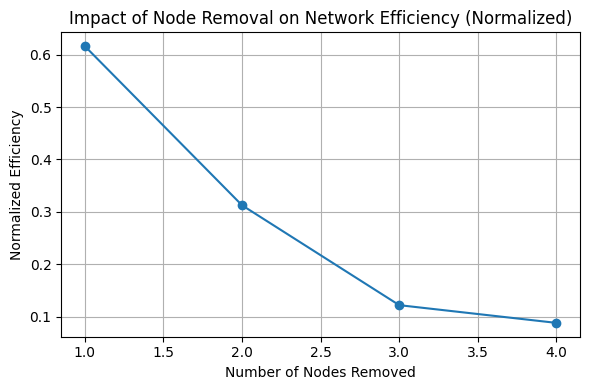

In [11]:
# Simulation for a single graph
simulate_fixed_node_removal_efficiency = compute_time(simulate_fixed_node_removal_efficiency) # time decorator

original_efficiency, efficiencies, num_removed, removed_nodes, removal_times = simulate_fixed_node_removal_efficiency(
    L_graph=subgraphs_by_size[10][0],
    num_to_remove=5,
    pct_to_remove=40, # priority over num_to_remove
    method='betweenness', # random or targeted or betweenness
    seed=42,
    verbose=True
)

# Plot results
plot_efficiency_results(num_removed, efficiencies)

In [12]:
# Simulation run for entire batch of subgraphs
run_removal_simulations = compute_time(run_removal_simulations) # time decorator

results_random = run_removal_simulations(
    subgraphs_by_size, 
    num_to_remove=5, 
    pct_to_remove=40, # priority over num_to_remove
    method='random', # random or targeted or betweenness
    seed=42)

results_targeted = run_removal_simulations(
    subgraphs_by_size, 
    num_to_remove=5, 
    pct_to_remove=40, # priority over num_to_remove
    method='targeted', # random or targeted or betweenness
    seed=42)

results_betweenness = run_removal_simulations(
    subgraphs_by_size, 
    num_to_remove=5, 
    pct_to_remove=40, # priority over num_to_remove
    method='betweenness', # random or targeted or betweenness
    seed=42)

Function 'run_removal_simulations' completed.
Execution time: 29.84 seconds

Function 'run_removal_simulations' completed.
Execution time: 332.66 seconds

Function 'run_removal_simulations' completed.
Execution time: 23.26 seconds



In [13]:
results_betweenness.head()

,graph_index,num_nodes,num_edges,runtime_seconds,original_efficiency,final_efficiency,efficiency_after_each_removal,removed_nodes,removal_times,eff_after_0,eff_after_1,eff_after_2,eff_after_3,eff_after_4,eff_after_5,eff_after_6,eff_after_7
0,0,10,18,0.261,0.020941,0.088500,"[0.6160532209775366, 0.3127117881879655, 0.122...","[418, 327, 299, 419]","[0.053, 0.0426, 0.0435, 0.0555]",0.616053,0.312712,0.122288,0.088500,NaN,NaN,NaN,NaN
1,1,10,18,0.490,0.080265,0.830586,"[0.40745523065113276, 0.4569913706103446, 0.60...","[77, 234, 388, 516]","[0.0873, 0.0818, 0.0803, 0.0761]",0.407455,0.456991,0.609322,0.830586,NaN,NaN,NaN,NaN
2,2,10,18,0.296,0.059985,0.225326,"[0.5390619714827624, 0.317394671212053, 0.1609...","[45, 42, 47, 41]","[0.0596, 0.052, 0.0476, 0.0472]",0.539062,0.317395,0.160947,0.225326,NaN,NaN,NaN,NaN
3,3,10,22,0.383,0.046574,0.300882,"[0.6264318652646236, 0.5582080643452935, 0.508...","[166, 167, 214, 35]","[0.1026, 0.0718, 0.0673, 0.0452]",0.626432,0.558208,0.508683,0.300882,NaN,NaN,NaN,NaN
4,4,10,18,0.339,0.084611,0.273584,"[0.6604450731943984, 0.31081218655016696, 0.19...","[268, 271, 273, 38]","[0.0728, 0.0532, 0.0587, 0.0462]",0.660445,0.310812,0.195417,0.273584,NaN,NaN,NaN,NaN


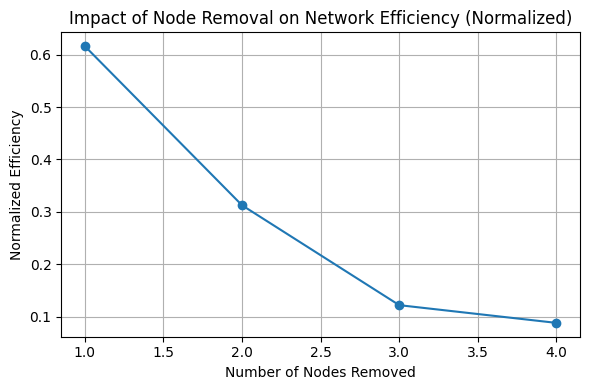

In [14]:
plot_efficiency_results_from_batch(results_betweenness.iloc[0])

In [15]:
%run functions/w2.py

In [18]:
compute_avg_runtime_by_num_nodes(results_targeted)

,num_nodes,num_nodes_removed,avg_runtime_seconds
0,10,4.0,2.7850
1,15,6.0,9.8497
2,20,8.0,20.6315


,Node Removed,Time Elapsed (s)
0,418,0.0530
1,327,0.0426
2,299,0.0435
3,419,0.0555


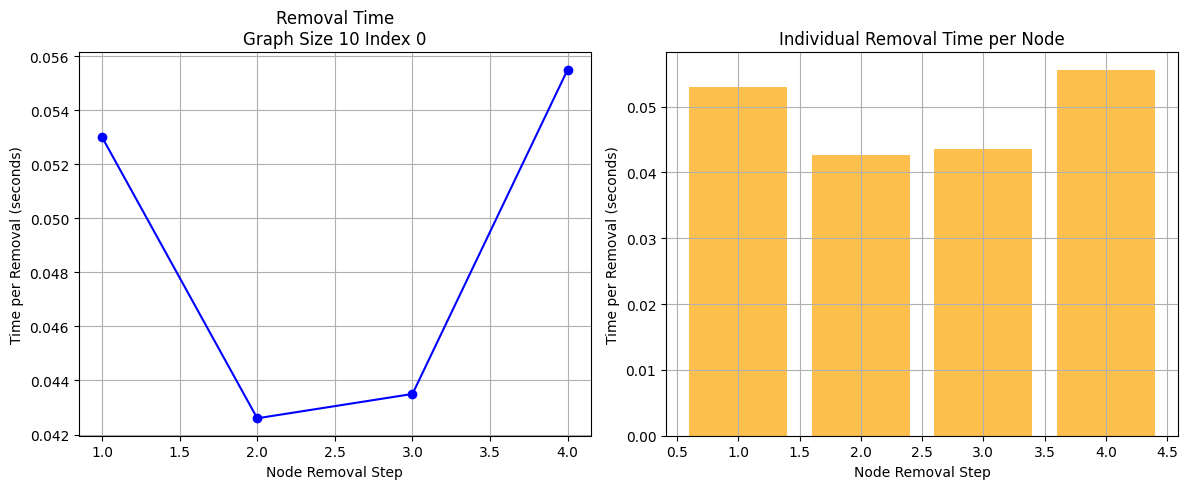

In [17]:
plot_removal_time_vs_steps(results_betweenness.iloc[0])